# Proyecto Individual 1

## Parte 1 EDA

Se importan galerias a utilizar

In [1]:
import pandas as pd
import numpy as np
import json


Como primer paso se carga el dataset de reviews y se analiza el dataframe, viendo columnas, nulos, forma, tamaños

In [2]:
# Se crea una lista en la que guardaremos diccionarios
linea_dicc = []

# Se abre y carga el archivo linea a linea (tiene problemas de forma)
with open('src/data/australian_user_reviews.json', 'r', encoding='utf-8') as a:
    for num_linea, linea in enumerate(a, start=1):
            data = eval(linea)
            linea_dicc.append(data)

# Finalmente se carga los datos a un dataframe y se imprimen los resultados
reviews = pd.DataFrame(linea_dicc)
#Hay 25799 registros, en 3 columnas
reviews.head()

,user_id,user_url,reviews
0,76561197970982479,http://steamcommunity.com/profiles/76561197970...,"[{'funny': '', 'posted': 'Posted November 5, 2..."
1,js41637,http://steamcommunity.com/id/js41637,"[{'funny': '', 'posted': 'Posted June 24, 2014..."
2,evcentric,http://steamcommunity.com/id/evcentric,"[{'funny': '', 'posted': 'Posted February 3.',..."
3,doctr,http://steamcommunity.com/id/doctr,"[{'funny': '', 'posted': 'Posted October 14, 2..."
4,maplemage,http://steamcommunity.com/id/maplemage,"[{'funny': '3 people found this review funny',..."


In [3]:
reviews['reviews'][1]#Se observa la composicion de la columna reviews, que esta anidada

[{'funny': '',
  'posted': 'Posted June 24, 2014.',
  'last_edited': '',
  'item_id': '251610',
  'helpful': '15 of 20 people (75%) found this review helpful',
  'recommend': True,
  'review': 'I know what you think when you see this title "Barbie Dreamhouse Party" but do not be intimidated by it\'s title, this is easily one of my GOTYs. You don\'t get any of that cliche game mechanics that all the latest games have, this is simply good core gameplay. Yes, you can\'t 360 noscope your friends, but what you can do is show them up with your bad ♥♥♥ dance moves and put them to shame as you show them what true fashion and color combinations are.I know this game says for kids but, this is easily for any age range and any age will have a blast playing this.8/8'},
 {'funny': '',
  'posted': 'Posted September 8, 2013.',
  'last_edited': '',
  'item_id': '227300',
  'helpful': '0 of 1 people (0%) found this review helpful',
  'recommend': True,
  'review': "For a simple (it's actually not all th

In [4]:
reviews.isna().sum().sort_values(ascending=False)#No hay datos nulos

user_id     0
user_url    0
reviews     0
dtype: int64

Se realiza la carga del dataset de juegos y se analiza el resultado:

In [5]:
#Se carga el dataframe de los juegos de steam y se imprime el resultado
juegos = pd.read_json('src/data/output_steam_games.json', lines=True)
juegos.head()
#Tiene 120445 datos

,publisher,genres,app_name,title,url,release_date,tags,reviews_url,specs,price,early_access,id,developer
0,None,None,None,None,None,None,None,None,None,None,NaN,NaN,None
1,None,None,None,None,None,None,None,None,None,None,NaN,NaN,None
2,None,None,None,None,None,None,None,None,None,None,NaN,NaN,None
3,None,None,None,None,None,None,None,None,None,None,NaN,NaN,None
4,None,None,None,None,None,None,None,None,None,None,NaN,NaN,None


In [6]:
juegos.isna().sum().sort_values(ascending=False) #Hay muchisimos datos nulos

publisher       96362
developer       91609
genres          91593
release_date    90377
title           90360
price           89687
specs           88980
tags            88473
app_name        88312
reviews_url     88312
id              88312
url             88310
early_access    88310
dtype: int64

Se carga y analiza el dataset de usuarios y se examina el resultado

In [7]:
import gzip

In [8]:
# Se crea una lista en la que guardaremos diccionarios
linea_dicc = []

# Se abre y carga el archivo linea a linea (tiene problemas de forma)
with gzip.open('src/data/users_items.json.gz', 'rt', encoding='utf-8') as a:
    for num_linea, linea in enumerate(a, start=1):
            data = eval(linea)
            linea_dicc.append(data)

# Finalmente se carga los datos a un dataframe y se imprimen los resultados
items = pd.DataFrame(linea_dicc)
items.head()
#88310 filas

,user_id,items_count,steam_id,user_url,items
0,76561197970982479,277,76561197970982479,http://steamcommunity.com/profiles/76561197970...,"[{'item_id': '10', 'item_name': 'Counter-Strik..."
1,js41637,888,76561198035864385,http://steamcommunity.com/id/js41637,"[{'item_id': '10', 'item_name': 'Counter-Strik..."
2,evcentric,137,76561198007712555,http://steamcommunity.com/id/evcentric,"[{'item_id': '1200', 'item_name': 'Red Orchest..."
3,Riot-Punch,328,76561197963445855,http://steamcommunity.com/id/Riot-Punch,"[{'item_id': '10', 'item_name': 'Counter-Strik..."
4,doctr,541,76561198002099482,http://steamcommunity.com/id/doctr,"[{'item_id': '300', 'item_name': 'Day of Defea..."


In [9]:
items['items'][1]#Se examina la columna anidada

[{'item_id': '10',
  'item_name': 'Counter-Strike',
  'playtime_forever': 0,
  'playtime_2weeks': 0},
 {'item_id': '80',
  'item_name': 'Counter-Strike: Condition Zero',
  'playtime_forever': 0,
  'playtime_2weeks': 0},
 {'item_id': '100',
  'item_name': 'Counter-Strike: Condition Zero Deleted Scenes',
  'playtime_forever': 0,
  'playtime_2weeks': 0},
 {'item_id': '300',
  'item_name': 'Day of Defeat: Source',
  'playtime_forever': 220,
  'playtime_2weeks': 0},
 {'item_id': '30',
  'item_name': 'Day of Defeat',
  'playtime_forever': 0,
  'playtime_2weeks': 0},
 {'item_id': '40',
  'item_name': 'Deathmatch Classic',
  'playtime_forever': 0,
  'playtime_2weeks': 0},
 {'item_id': '60',
  'item_name': 'Ricochet',
  'playtime_forever': 0,
  'playtime_2weeks': 0},
 {'item_id': '240',
  'item_name': 'Counter-Strike: Source',
  'playtime_forever': 62,
  'playtime_2weeks': 0},
 {'item_id': '280',
  'item_name': 'Half-Life: Source',
  'playtime_forever': 0,
  'playtime_2weeks': 0},
 {'item_id': 

In [10]:
items.isna().sum().sort_values(ascending=False) #No hay datos nulos

user_id        0
items_count    0
steam_id       0
user_url       0
items          0
dtype: int64

# Parte 2 ETL

### Reviews

La columna reviews tiene los datos anidados, se procede a separarlos en columnas e integrarlo al dataframe reviews_sinuser, tambien se reemplaza '' por nan

In [11]:
df_exploded = reviews.explode('reviews') #se separa en filas distintas cada review
df_normalized = pd.json_normalize(df_exploded['reviews'])#se separa en columnas la columna anidada
df_normalized.head()


,funny,posted,last_edited,item_id,helpful,recommend,review
0,,"Posted November 5, 2011.",,1250,No ratings yet,True,Simple yet with great replayability. In my opi...
1,,"Posted July 15, 2011.",,22200,No ratings yet,True,It's unique and worth a playthrough.
2,,"Posted April 21, 2011.",,43110,No ratings yet,True,Great atmosphere. The gunplay can be a bit chu...
3,,"Posted June 24, 2014.",,251610,15 of 20 people (75%) found this review helpful,True,I know what you think when you see this title ...
4,,"Posted September 8, 2013.",,227300,0 of 1 people (0%) found this review helpful,True,For a simple (it's actually not all that simpl...


In [12]:
df_exploded.reset_index(drop=True, inplace=True)#reseteamos indices
df_normalized.reset_index(drop=True, inplace=True)

In [13]:
# Combinar con el DataFrame original
reviews_f = pd.concat([df_exploded, df_normalized], axis=1).drop('reviews', axis=1)

# Mostrar el DataFrame resultante
reviews_f.head()

,user_id,user_url,funny,posted,last_edited,item_id,helpful,recommend,review
0,76561197970982479,http://steamcommunity.com/profiles/76561197970...,,"Posted November 5, 2011.",,1250,No ratings yet,True,Simple yet with great replayability. In my opi...
1,76561197970982479,http://steamcommunity.com/profiles/76561197970...,,"Posted July 15, 2011.",,22200,No ratings yet,True,It's unique and worth a playthrough.
2,76561197970982479,http://steamcommunity.com/profiles/76561197970...,,"Posted April 21, 2011.",,43110,No ratings yet,True,Great atmosphere. The gunplay can be a bit chu...
3,js41637,http://steamcommunity.com/id/js41637,,"Posted June 24, 2014.",,251610,15 of 20 people (75%) found this review helpful,True,I know what you think when you see this title ...
4,js41637,http://steamcommunity.com/id/js41637,,"Posted September 8, 2013.",,227300,0 of 1 people (0%) found this review helpful,True,For a simple (it's actually not all that simpl...


In [14]:
reviews_f['funny'] = reviews_f['funny'].replace('', np.nan)

In [15]:
reviews_f['last_edited'] = reviews_f['last_edited'].replace('', np.nan)

In [16]:
reviews_f.head()#resultado

,user_id,user_url,funny,posted,last_edited,item_id,helpful,recommend,review
0,76561197970982479,http://steamcommunity.com/profiles/76561197970...,NaN,"Posted November 5, 2011.",NaN,1250,No ratings yet,True,Simple yet with great replayability. In my opi...
1,76561197970982479,http://steamcommunity.com/profiles/76561197970...,NaN,"Posted July 15, 2011.",NaN,22200,No ratings yet,True,It's unique and worth a playthrough.
2,76561197970982479,http://steamcommunity.com/profiles/76561197970...,NaN,"Posted April 21, 2011.",NaN,43110,No ratings yet,True,Great atmosphere. The gunplay can be a bit chu...
3,js41637,http://steamcommunity.com/id/js41637,NaN,"Posted June 24, 2014.",NaN,251610,15 of 20 people (75%) found this review helpful,True,I know what you think when you see this title ...
4,js41637,http://steamcommunity.com/id/js41637,NaN,"Posted September 8, 2013.",NaN,227300,0 of 1 people (0%) found this review helpful,True,For a simple (it's actually not all that simpl...


In [17]:
reviews_final=reviews_f.drop_duplicates()#elimino duplicados quedando 58459 datos de 59333.
reviews_final.info()

<class 'pandas.core.frame.DataFrame'>
Index: 58459 entries, 0 to 59332
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   user_id      58459 non-null  object
 1   user_url     58459 non-null  object
 2   funny        8010 non-null   object
 3   posted       58431 non-null  object
 4   last_edited  6037 non-null   object
 5   item_id      58431 non-null  object
 6   helpful      58431 non-null  object
 7   recommend    58431 non-null  object
 8   review       58431 non-null  object
dtypes: object(9)
memory usage: 4.5+ MB


In [18]:
from textblob import TextBlob #se importa esta libreria para hacer el analisis de sentimineto

In [19]:
def classify_sentiment(text):
    if isinstance(text, str):  # Comprueba si el valor es una cadena
        analysis = TextBlob(text)
        polarity = analysis.sentiment.polarity

        # Clasificar según la polaridad
        if polarity < -0.1:
            return 0  # Reseña mala
        elif polarity > 0:
            return 2  # Reseña positiva
        else:
            return 1  # Reseña neutra
    else:
        return np.nan  # Devuelve NaN si el valor no es una cadena

# Aplicar la función a la columna 'review' y guardar los resultados en la nueva columna 'sentiment_analysis'
reviews_final['review'] = reviews_final['review'].apply(classify_sentiment)


C:\TEMP\ipykernel_13912\969185187.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  reviews_final['review'] = reviews_final['review'].apply(classify_sentiment)


In [20]:
reviews_final.head()

,user_id,user_url,funny,posted,last_edited,item_id,helpful,recommend,review
0,76561197970982479,http://steamcommunity.com/profiles/76561197970...,NaN,"Posted November 5, 2011.",NaN,1250,No ratings yet,True,2.0
1,76561197970982479,http://steamcommunity.com/profiles/76561197970...,NaN,"Posted July 15, 2011.",NaN,22200,No ratings yet,True,2.0
2,76561197970982479,http://steamcommunity.com/profiles/76561197970...,NaN,"Posted April 21, 2011.",NaN,43110,No ratings yet,True,2.0
3,js41637,http://steamcommunity.com/id/js41637,NaN,"Posted June 24, 2014.",NaN,251610,15 of 20 people (75%) found this review helpful,True,2.0
4,js41637,http://steamcommunity.com/id/js41637,NaN,"Posted September 8, 2013.",NaN,227300,0 of 1 people (0%) found this review helpful,True,1.0


In [21]:
counts = reviews_final['review'].value_counts()
print(counts)

review
2.0    33053
1.0    17408
0.0     7970
Name: count, dtype: int64


### Juegos

Al dataframe juegos se eliminan nulos, duplicados y ciertas columnas

In [22]:
juegos1=juegos.dropna(how='all') #Se eliminan las filas que no tienen ningun registro, quedando 32135 registros

In [23]:
juegos1=juegos1.drop_duplicates(subset=['id'])#elimino los juegos duplicados, basandome en el id, solo se eliminan 2 quedando 32133 juegos

In [24]:
juegos1=juegos1.drop(['publisher','title','url','tags','reviews_url','specs','developer'], axis=1)

In [25]:
juegos1.head()

,genres,app_name,release_date,price,early_access,id
88310,"[Action, Casual, Indie, Simulation, Strategy]",Lost Summoner Kitty,2018-01-04,4.99,0.0,761140.0
88311,"[Free to Play, Indie, RPG, Strategy]",Ironbound,2018-01-04,Free To Play,0.0,643980.0
88312,"[Casual, Free to Play, Indie, Simulation, Sports]",Real Pool 3D - Poolians,2017-07-24,Free to Play,0.0,670290.0
88313,"[Action, Adventure, Casual]",弹炸人2222,2017-12-07,0.99,0.0,767400.0
88314,None,Log Challenge,None,2.99,0.0,773570.0


### items

Al data frame items se le eliminan duplicados y algunas columnas, posteriormente se desanida la columna items

In [26]:
items1=items.drop_duplicates(subset=['user_id'])#elimino los usuarios duplicados, basandome en el id
##quedan 87626 datos de 88310

In [27]:
items1=items1.drop(['user_url','steam_id'],axis=1)
items1.head()

,user_id,items_count,items
0,76561197970982479,277,"[{'item_id': '10', 'item_name': 'Counter-Strik..."
1,js41637,888,"[{'item_id': '10', 'item_name': 'Counter-Strik..."
2,evcentric,137,"[{'item_id': '1200', 'item_name': 'Red Orchest..."
3,Riot-Punch,328,"[{'item_id': '10', 'item_name': 'Counter-Strik..."
4,doctr,541,"[{'item_id': '300', 'item_name': 'Day of Defea..."


In [28]:
df_list = []

# Iterar a través de cada fila del DataFrame y aplicar el proceso de normalización
for index, row in items1.iterrows():
    df_normalized = pd.json_normalize(row['items'])
    if not df_normalized.empty:
        df_combined = pd.concat([pd.DataFrame(row).transpose()] * len(df_normalized), ignore_index=True)
        df_combined = pd.concat([df_combined, df_normalized], axis=1)
        df_list.append(df_combined)

# Combinar los DataFrames resultantes en uno solo si hay elementos en df_list
if df_list:
    df_final = pd.concat(df_list, ignore_index=True)
    # Mostrar el DataFrame resultante
    print(df_final)
else:
    print("No se generaron DataFrames para concatenar.")



                   user_id items_count  \
0        76561197970982479         277   
1        76561197970982479         277   
2        76561197970982479         277   
3        76561197970982479         277   
4        76561197970982479         277   
...                    ...         ...   
5094077  76561198329548331           7   
5094078  76561198329548331           7   
5094079  76561198329548331           7   
5094080  76561198329548331           7   
5094081  76561198329548331           7   

                                                     items item_id  \
0        [{'item_id': '10', 'item_name': 'Counter-Strik...      10   
1        [{'item_id': '10', 'item_name': 'Counter-Strik...      20   
2        [{'item_id': '10', 'item_name': 'Counter-Strik...      30   
3        [{'item_id': '10', 'item_name': 'Counter-Strik...      40   
4        [{'item_id': '10', 'item_name': 'Counter-Strik...      50   
...                                                    ...     ...   
50940

In [29]:
items_fin=df_final.drop('items',axis=1)

In [30]:
items_fin.head()

,user_id,items_count,item_id,item_name,playtime_forever,playtime_2weeks
0,76561197970982479,277,10,Counter-Strike,6,0
1,76561197970982479,277,20,Team Fortress Classic,0,0
2,76561197970982479,277,30,Day of Defeat,7,0
3,76561197970982479,277,40,Deathmatch Classic,0,0
4,76561197970982479,277,50,Half-Life: Opposing Force,0,0


In [31]:
items_fin_sin_0= items_fin[items_fin['playtime_forever'] != 0]#se eliminan las filas en que el usuario no jugo 
#quedan 3246352 de 5094082 

In [32]:
items_fin_sin_0.reset_index(drop=True, inplace=True)


In [33]:
juegos1.reset_index(drop=True, inplace=True)

In [34]:
reviews_final.reset_index(drop=True, inplace=True)

## Parte 3 tratamiento outliers

In [35]:
import matplotlib.pyplot as plt
import seaborn as sns

C:\TEMP\ipykernel_13912\3479629291.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(items_fin_sin_0['playtime_forever'], hist=True, kde=True, rug=True) #Se observa la distribucion y se ve que claramente muchos juegos se han jugado poco


<Axes: xlabel='playtime_forever', ylabel='Density'>

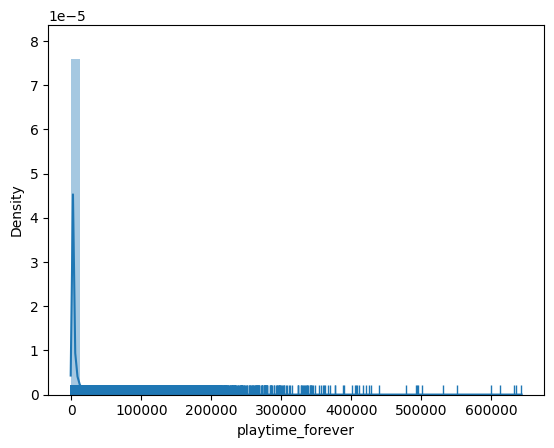

In [36]:
sns.distplot(items_fin_sin_0['playtime_forever'], hist=True, kde=True, rug=True) #Se observa la distribucion y se ve que claramente muchos juegos se han jugado poco


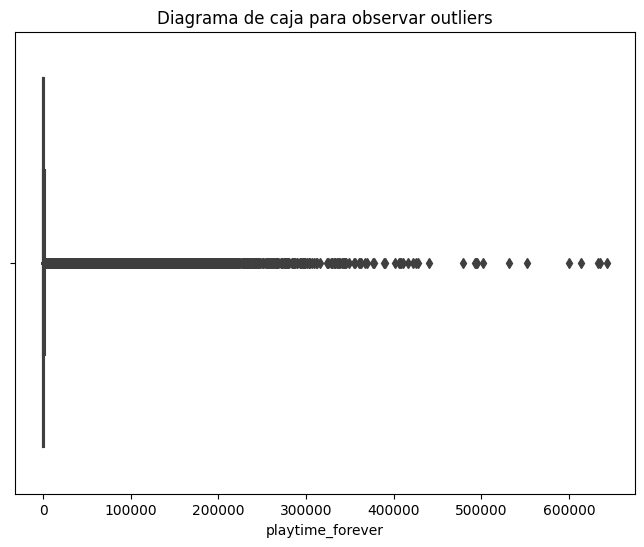

In [37]:
plt.figure(figsize=(8, 6))
#En el boxplot se pueden observar los cuartiles, pero en este caso debido.. 
#a la gran aglomeracion en las pocas horas jugadas hace que el boxplot se vea como una linea
sns.boxplot(x=items_fin_sin_0['playtime_forever'])
plt.title('Diagrama de caja para observar outliers')
plt.show()

In [38]:
Q1 = items_fin_sin_0['playtime_forever'].quantile(0.25)
Q3 = items_fin_sin_0['playtime_forever'].quantile(0.75)
IQR = Q3 - Q1
print(Q1,Q3,IQR)

44.0 808.0 764.0


In [39]:
# Definir límites para detectar outliers
lower_limit = Q1 - 1.5 * IQR
upper_limit = Q3 + 1.5* IQR
print (lower_limit, upper_limit)
#El resultado de los limites (-1102,1954) se los va a modificar, debido a que el minimo de hs jugadas debe ser 0
# y el maximo de hs jugadas podria ser mayor
# Se utilizara minimo 0, max=5hs/dia*60min*365dias=109500  (se toma un valor que considero extremo[4hs/dia durante un año])

-1102.0 1954.0


In [40]:
# Filtrar outliers
lower_limit=0
upper_limit=109500
items_fin_filtered = items_fin_sin_0[(items_fin_sin_0['playtime_forever'] > lower_limit) & (items_fin_sin_0['playtime_forever'] < upper_limit)]

## Parte 4 Funciones

### Funcion 1

Debe devolver año con mas horas jugadas para dicho género.
Primero se crean los df necesarios y se los une, luego se crea la funcion 

In [41]:
#se desanida columna gebre
genero=juegos1.explode('genres')
genero = genero.rename(columns={'id': 'item_id'})
genero.head()

,genres,app_name,release_date,price,early_access,item_id
0,Action,Lost Summoner Kitty,2018-01-04,4.99,0.0,761140.0
0,Casual,Lost Summoner Kitty,2018-01-04,4.99,0.0,761140.0
0,Indie,Lost Summoner Kitty,2018-01-04,4.99,0.0,761140.0
0,Simulation,Lost Summoner Kitty,2018-01-04,4.99,0.0,761140.0
0,Strategy,Lost Summoner Kitty,2018-01-04,4.99,0.0,761140.0


In [42]:
funcion1i=['item_id','playtime_forever']
funcion1g=['genres','release_date','item_id']
df1=items_fin_sin_0[funcion1i]
df11=genero[funcion1g]

In [43]:
df1['item_id'] = pd.to_numeric(df1['item_id'], errors='coerce').fillna(0).astype(int)
df11['item_id'] = pd.to_numeric(df11['item_id'], errors='coerce').fillna(0).astype(int)
#por problemas en el formato de la columna item_id, hay que pasarlo a int para lograr el merge

C:\TEMP\ipykernel_13912\2667276988.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['item_id'] = pd.to_numeric(df1['item_id'], errors='coerce').fillna(0).astype(int)
C:\TEMP\ipykernel_13912\2667276988.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df11['item_id'] = pd.to_numeric(df11['item_id'], errors='coerce').fillna(0).astype(int)


In [44]:
# Fusionar DataFrames después de convertir los tipos de datos
funcion_1 = pd.merge(df1, df11, on='item_id')

In [45]:
import re
# Crear una función para extraer el año usando expresiones regulares
def obtener_anio(fecha):
    if fecha is not None:
        match = re.search(r'\d{4}', str(fecha))  # Convierte fecha a cadena y luego busca el patrón de cuatro dígitos que represente el año
        if match:
            return match.group()
        else:
            return 'Formato de fecha no válido'
    else:
        return 'Valor nulo'

# Aplicar la función a la columna 'fecha' y almacenar los resultados en una nueva columna 'anio'
funcion_1['release_date'] = funcion_1['release_date'].apply(obtener_anio)

In [46]:
funcion_1.reset_index(drop=True, inplace=True)

In [47]:
def PlayTimeGenre(genero):
    data_genero = funcion_1[funcion_1['genres'] == genero]  # Filtrar el DataFrame por el género especificado
    data_genero_agrupado = data_genero.groupby('release_date')['playtime_forever'].sum()  # Calcular el tiempo total jugado por año
    anio_max_tiempo = data_genero_agrupado.idxmax()  # Encontrar el año con el tiempo máximo
    return anio_max_tiempo

In [48]:
a=PlayTimeGenre('Action')
a

'2012'

### Funcion 2

Debe devolver el usuario que acumula más horas jugadas para el género dado y una lista de la acumulación de horas jugadas por año.
Primero se crean los df necesarios y se los une, finalmente se crea la funcion

In [49]:
juegos1.head()

,genres,app_name,release_date,price,early_access,id
0,"[Action, Casual, Indie, Simulation, Strategy]",Lost Summoner Kitty,2018-01-04,4.99,0.0,761140.0
1,"[Free to Play, Indie, RPG, Strategy]",Ironbound,2018-01-04,Free To Play,0.0,643980.0
2,"[Casual, Free to Play, Indie, Simulation, Sports]",Real Pool 3D - Poolians,2017-07-24,Free to Play,0.0,670290.0
3,"[Action, Adventure, Casual]",弹炸人2222,2017-12-07,0.99,0.0,767400.0
4,None,Log Challenge,None,2.99,0.0,773570.0


In [50]:
#Hago una transformacion del formato fecha
reviews_final['posted'] = reviews_final['posted'].apply(obtener_anio)
reviews_final = reviews_final[reviews_final['posted'] != 'Formato de fecha no válido'] 
reviews_final['posted'] = pd.to_datetime(reviews_final['posted']) 



#Hago una transformacion del formato de item_id
genero['item_id'] = pd.to_numeric(genero['item_id'], errors='coerce').fillna(0).astype(int)
reviews_final['item_id'] = pd.to_numeric(reviews_final['item_id'], errors='coerce').fillna(0).astype(int)
items_fin_filtered['item_id'] = pd.to_numeric(items_fin_filtered['item_id'], errors='coerce').fillna(0).astype(int)
juegos1.rename(columns={'id': 'item_id'}, inplace=True)
juegos1['item_id'] = pd.to_numeric(juegos1['item_id'], errors='coerce').fillna(0).astype(int)

C:\TEMP\ipykernel_13912\810668550.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  reviews_final['posted'] = reviews_final['posted'].apply(obtener_anio)
C:\TEMP\ipykernel_13912\810668550.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  items_fin_filtered['item_id'] = pd.to_numeric(items_fin_filtered['item_id'], errors='coerce').fillna(0).astype(int)


In [51]:
#Genero los df que necesito
funcion2g=['genres','item_id']
funcion2r=['posted','user_id']
funcion2i=['user_id','item_id','playtime_forever']
dfg=genero[funcion2g]
dfr=reviews_final[funcion2r]
dfi=items_fin_filtered[funcion2i]

In [52]:
# Unir los dos primeros dataframes
merged_df_intermediate = dfr.merge(dfi, on='user_id')
# Unir el dataframe resultante con el tercer dataframe
funcion_2 = merged_df_intermediate.merge(dfg, on='item_id')
# Mostrar el dataframe resultante
funcion_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8396993 entries, 0 to 8396992
Data columns (total 5 columns):
 #   Column            Dtype         
---  ------            -----         
 0   posted            datetime64[ns]
 1   user_id           object        
 2   item_id           int32         
 3   playtime_forever  int64         
 4   genres            object        
dtypes: datetime64[ns](1), int32(1), int64(1), object(2)
memory usage: 288.3+ MB


In [53]:
#Elimino duplicados y los nulos
df_no_duplicates = funcion_2.drop_duplicates(subset=['user_id', 'item_id', 'playtime_forever', 'genres'], keep='first')
funcion2= df_no_duplicates.dropna(subset=['posted'])

In [54]:
funcion2.reset_index(drop=True, inplace=True)

In [55]:
def UserForGenre(genero):
    funcion2['posted'] = pd.to_datetime(funcion2['posted'])  # Convertir 'posted' a tipo datetime
    df_filtered = funcion2[funcion2['genres'] == genero]
    max_hours_user = df_filtered.groupby('user_id')['playtime_forever'].sum().idxmax()
    acumulacion_por_anio = df_filtered.groupby(df_filtered['posted'].dt.year)['playtime_forever'].sum().tolist()
    return max_hours_user, acumulacion_por_anio

In [93]:
# Pruebo la funcion
genero_dado = 'Adventure'
resultado = UserForGenre(genero_dado)

('REBAS_AS_F-T', [316654, 2745002, 7315862, 47308708, 172629003, 171992349])

## Funcion 3

Devuelve el top 3 de juegos MÁS recomendados por usuarios para el año dado. (reviews.recommend = True y comentarios positivos/neutrales)

In [57]:
#Genero los df que necesito
funcion3r=['posted','item_id','recommend','review']
funcion3j=['app_name','item_id']
df3r=reviews_final[funcion3r]
df3j=juegos1[funcion3j]


In [58]:
funcion_3 = df3r.merge(df3j, on='item_id')
funcion_3['score'] = ''
# Mostrar el dataframe resultante
funcion_3.head()

,posted,item_id,recommend,review,app_name,score
0,2011-01-01,1250,True,2.0,Killing Floor,
1,2015-01-01,1250,True,2.0,Killing Floor,
2,2013-01-01,1250,True,2.0,Killing Floor,
3,2015-01-01,1250,True,1.0,Killing Floor,
4,2014-01-01,1250,True,1.0,Killing Floor,


In [59]:
def UsersRecommend(year):
    funcion_3['score'] = 0
    #Se realiza un sistema de puntajes para evitar el sesgo por popularidad de un juego, el cual tendria muchos
    #positivos pero probablemente muchos negativos, pudiendo aparecer en los mas recomendados y en los menos al mismo tiempo
    for index, row in funcion_3.iterrows():
        if row['recommend']:
            funcion_3.at[index, 'score'] += 1
        else:
            funcion_3.at[index, 'score'] -= 1
        if row['review'] == 2:
            funcion_3.at[index, 'score'] += 1
        elif row['review'] == 0:
            funcion_3.at[index, 'score'] -= 1
    funcion_3_filtered = funcion_3[funcion_3['posted'].dt.year == year]
    ranking = funcion_3_filtered.groupby('app_name')['score'].sum().nlargest(3).reset_index()
    return  ranking

In [60]:
#Prueba
resultado = UsersRecommend(2015)
resultado

,app_name,score
0,Counter-Strike: Global Offensive,2025
1,Team Fortress 2,941
2,Garry's Mod,468


## Funcion 4

Devuelve el top 3 de juegos MENOS recomendados por usuarios para el año dado. (reviews.recommend = False y comentarios negativos)

In [61]:
def UsersNotRecommend(year):
    funcion_3['score'] = 0
    #Se realiza un sistema de puntajes para evitar el sesgo por popularidad de un juego, el cual tendria muchos
    #positivos pero probablemente muchos negativos, pudiendo aparecer en los mas recomendados y en los menos al mismo tiempo
    for index, row in funcion_3.iterrows():
        if row['recommend']:
            funcion_3.at[index, 'score'] += 1
        else:
            funcion_3.at[index, 'score'] -= 1
        if row['review'] == 2:
            funcion_3.at[index, 'score'] += 1
        elif row['review'] == 0:
            funcion_3.at[index, 'score'] -= 1
    funcion_3['posted'] = pd.to_datetime(funcion_3['posted'])
    funcion_4_filtered = funcion_3[funcion_3['posted'].dt.year == year]
    ranking = funcion_4_filtered.groupby('app_name')['score'].sum().nsmallest(3).reset_index()
    return  ranking

In [62]:
r=UsersNotRecommend(2015)
r

,app_name,score
0,Brick-Force,-13
1,NBA 2K16,-8
2,Uriel's Chasm,-5


## Funcion 5


Según el año de lanzamiento, se devuelve una lista con la cantidad de registros de reseñas de usuarios que se encuentren categorizados con un análisis de sentimiento.

In [63]:
#Se realiza el df con las columnas posted y review. Se utiliza posted y no release data por que esta mas relacionado
# a la review en concreto a la que se le hace el sentimentanalysis
df5=['posted','review']
funcion_5=reviews_final[df5]

In [64]:
funcion_5.head()

,posted,review
0,2011-01-01,2.0
1,2011-01-01,2.0
2,2011-01-01,2.0
3,2014-01-01,2.0
4,2013-01-01,1.0


In [65]:
#Se formula la funcion inicializando variables y sumando segun sea el caso
def sentiment_analysis( año : int ): 
    Positivo=0
    Negativo=0
    Neutro=0
    funcion_5['posted'] = funcion_5['posted'].str.split('-').str[0]
    funcion_5_filtered = funcion_5[funcion_5['posted'] == año]
    for index, row in funcion_5_filtered.iterrows():
         if row['review'] == 2:
            Positivo+=1
         elif row['review'] == 0:
            Negativo+=1
         else:
            Neutro+=1
    return{'Positivos': Positivo,' Negativos': Negativo, ' Neutros': Neutro}

In [66]:
def sentiment_analysis(año: int): 
    Positivo = 0
    Negativo = 0
    Neutro = 0
    funcion_5['posted'] = pd.to_datetime(funcion_5['posted'])
    funcion_5_filtered = funcion_5[funcion_5['posted'].dt.year == año]
    for index, row in funcion_5_filtered.iterrows():
         if row['review'] == 2:
            Positivo += 1
         elif row['review'] == 0:
            Negativo += 1
         else:
            Neutro += 1
    return {'Positivos': Positivo, 'Negativos': Negativo, 'Neutros': Neutro}

In [67]:
a=sentiment_analysis(2014)
a

C:\TEMP\ipykernel_13912\3542008341.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  funcion_5['posted'] = pd.to_datetime(funcion_5['posted'])


{'Positivos': 12709, 'Negativos': 2770, 'Neutros': 6355}

## Parte 5 Crear csv para fastapi


Armo csv's con posibles resultados de las funciones

In [68]:
#Armo dataframe con resultados y lo paso a csv
#Armo df para aplicar funcion, eliminando none y accounting porq no tienen datos
gen = genero['genres'].unique()
gen = [x for x in gen if x!=None]
gen = [x for x in gen if x!='Accounting']
df_genero = pd.DataFrame(gen, columns=['Género'])
#Aplico funcion
df_genero['Año resultado'] = df_genero['Género'].apply(PlayTimeGenre)
#Exporto
ruta_carpeta = r'C:\Users\nicoi\Desktop\HENRY\Henry data\Fast Api\datas'
nombre_archivo = 'f1.parquet'
ruta_completa = ruta_carpeta + nombre_archivo
df_genero.to_parquet(ruta_completa, index=False)

In [69]:
df_genero.head()

,Género,Año resultado
0,Action,2012
1,Casual,2015
2,Indie,2006
3,Simulation,2006
4,Strategy,2013


In [70]:
#Armo dataframe con resultados y lo paso a csv
#Armo df para aplicar funcion, eliminando none y accounting porq no tienen datos
gen = genero['genres'].unique()
gen = [x for x in gen if x!=None]
gen = [x for x in gen if x!='Accounting']
df_generos = pd.DataFrame(gen, columns=['Género'])
#Aplico funcion
df_generos['Usuario'] = df_generos['Género'].apply(PlayTimeGenre)
#Aplico funcion
df_generos[['usuario', 'hs por año']] = df_generos['Género'].apply(UserForGenre).apply(pd.Series)
#Exporto
ruta_carpeta = r'C:\Users\nicoi\Desktop\HENRY\Henry data\Fast Api\datas'
nombre_archivo = 'f2.parquet'
ruta_completa = ruta_carpeta + nombre_archivo
df_generos.to_parquet(ruta_completa, index=False)

In [71]:
df_generos.head()

,Género,Usuario,usuario,hs por año
0,Action,2012,REBAS_AS_F-T,"[714380, 8425960, 23173534, 150028401, 5603908..."
1,Casual,2015,REBAS_AS_F-T,"[109120, 1003188, 2226473, 11591150, 45124229,..."
2,Indie,2006,REBAS_AS_F-T,"[322173, 4358078, 11199487, 72249952, 28040212..."
3,Simulation,2006,REBAS_AS_F-T,"[103376, 1960712, 5679939, 40192346, 160733456..."
4,Strategy,2013,shinomegami,"[196586, 2577765, 5141359, 31085794, 117049974..."


In [72]:
#Se genera df de resultados
años = funcion_3['posted'].unique()
# Convertir la lista de fechas a una serie de Pandas
serie_fechas = pd.Series(años)
# Convertir la serie de Pandas a tipo datetime y extraer los años
anios = pd.to_datetime(serie_fechas).dt.year
# Convertir la serie de años en un DataFrame
df_anios = pd.DataFrame(anios, columns=['posted'])
df_anios = df_anios.sort_values('posted')
df_anios = df_anios.reset_index(drop=True)
#Se crea el df
dataframes = []
for index, row in df_anios.iterrows():
    year = row['posted']
    df_resultado = UsersRecommend(year)
    df_resultado['Año'] = year  # Agregar la columna 'Año'
    dataframes.append(df_resultado)

# Combinar todos los DataFrames en uno solo
f3 = pd.concat(dataframes, ignore_index=True)
#Exporto
ruta_carpeta = r'C:\Users\nicoi\Desktop\HENRY\Henry data\Fast Api\datas'
nombre_archivo = 'f3.parquet'
ruta_completa = ruta_carpeta + nombre_archivo
f3.to_parquet(ruta_completa, index=False)

In [73]:
f3.head()

,app_name,score,Año
0,Team Fortress 2,18,2010
1,Killing Floor,11,2010
2,Alien Swarm,7,2010
3,Team Fortress 2,116,2011
4,Portal 2,45,2011


In [74]:
#Se crea el df
dataframes = []
for index, row in df_anios.iterrows():
    year = row['posted']
    df_resultado = UsersNotRecommend(year)
    df_resultado['Año'] = year  # Agregar la columna 'Año'
    dataframes.append(df_resultado)

# Combinar todos los DataFrames en uno solo
f4 = pd.concat(dataframes, ignore_index=True)
#Exporto
ruta_carpeta = r'C:\Users\nicoi\Desktop\HENRY\Henry data\Fast Api\datas'
nombre_archivo = 'f4.parquet'
ruta_completa = ruta_carpeta + nombre_archivo
f4.to_parquet(ruta_completa, index=False)

In [75]:
f4.head()

,app_name,score,Año
0,Civilization IV: Beyond the Sword,0,2010
1,Empire: Total War™,0,2010
2,IL-2 Sturmovik: 1946,0,2010
3,And Yet It Moves,-3,2011
4,Men of War: Vietnam,-2,2011


In [76]:
dataframes = []
for index, row in df_anios.iterrows():
    year = row['posted']
    df_resultado = sentiment_analysis(year)
    df_resultado['Año'] = year  # Agregar la columna 'Año'
    dataframes.append(df_resultado)
    f5=pd.DataFrame(dataframes)
#Exporto
ruta_carpeta = r'C:\Users\nicoi\Desktop\HENRY\Henry data\Fast Api\datas'
nombre_archivo = 'f5.parquet'
ruta_completa = ruta_carpeta + nombre_archivo
f5.to_parquet(ruta_completa, index=False)
    

C:\TEMP\ipykernel_13912\3542008341.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  funcion_5['posted'] = pd.to_datetime(funcion_5['posted'])
C:\TEMP\ipykernel_13912\3542008341.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  funcion_5['posted'] = pd.to_datetime(funcion_5['posted'])
C:\TEMP\ipykernel_13912\3542008341.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documenta